In [4]:
!git clone https://github.com/fizyr/keras-retinanet.git

fatal: destination path 'keras-retinanet' already exists and is not an empty directory.


In [5]:
%cd keras-retinanet/

!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Preparing metadata (setup.py) ... done
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp310-cp310-linux_x86_64.whl size=208015 sha256=7f3882296550e8e67a39d4cf9018b5a0e894a26f7e43d61695b4a5c0a6082ff8
  Stored in directory: /root/.cache/pip/wheels/30/a8/71/bccf2f8331abdd2183df34261c5faea07ce65324a12c97af2e
Successfully built keras-retinanet
  Attempting uninstall: keras-retinanet
    Found existing installation: keras-retinanet 1.0.0
    Uninstalling keras-retinanet-1.0.0:
      Successfully uninstalled keras-retinanet-1.0.0


In [6]:
!python setup.py build_ext --inplace

/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running build_ext


In [7]:
import os
import shutil
import zipfile
import urllib
import xml.etree.ElementTree as ET
import numpy as np
import csv
import pandas
from google.colab import drive
from google.colab import files

In [ ]:
DATASET_DRIVEID = '1NFELQ2roA8ap9JCxo0OAbhvzs6BIEQEZ'

In [ ]:
DATASET_DIR = 'dataset'
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!unzip -u "/content/drive/My Drive/train.zip" -d "/content/drive/My Drive/dataset_retinanet"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/dataset_retinanet/train/P02390_jpg.rf.943ba7c72d9b941a9eeb08271223ae24.jpg  
  inflating: /content/drive/My Drive/dataset_retinanet/train/P02391_jpg.rf.e64f17ebd8ccbc3ff0f9058bd66b8e2f.jpg  
  inflating: /content/drive/My Drive/dataset_retinanet/train/P02393_jpg.rf.de8ad25f78760cedfbaae2d54f4c49d9.jpg  
  inflating: /content/drive/My Drive/dataset_retinanet/train/P02394_jpg.rf.ab8a71f2be293cce5391fff5b41275b7.jpg  
  inflating: /content/drive/My Drive/dataset_retinanet/train/P02395_jpg.rf.3a307ee6f0591ffe883a762c6dc60d4e.jpg  
  inflating: /content/drive/My Drive/dataset_retinanet/train/P02396_jpg.rf.c022f5577aa93a1a1f2d57208871c5e0.jpg  
  inflating: /content/drive/My Drive/dataset_retinanet/train/P02397_jpg.rf.abbf06c164a197d72851b42134c92bf9.jpg  
  inflating: /content/drive/My Drive/dataset_retinanet/train/P02398_jpg.rf.e8832d70727c477b658fb29f73b913e4.jpg  
  inflating: /content/drive/My Drive/

In [ ]:
import shutil

source_path = '/content/drive/My Drive/dataset_retinanet/train/_annotations.csv'
destination_path = '_annotations.csv'

shutil.copy(source_path, destination_path)


'_annotations.csv'

In [ ]:
%pwd

'/content/keras-retinanet'

In [ ]:
import pandas as pd

# Assuming the file is in the current working directory
file_path = '_annotations.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df)


      P06954_jpg.rf.2f6f46cf18b0c8ccff85b54fa7109f81.jpg  299  163  319  173  \
0      P06954_jpg.rf.2f6f46cf18b0c8ccff85b54fa7109f81...  296  157  319  176   
1      P06436_jpg.rf.2fac93d87f3f101f5bfccf8f9af6b9ad...  228  133  261  203   
2      P02354_jpg.rf.2fc741af2cf85a0fda58db7887382f7c...  116  147  291  259   
3      P02354_jpg.rf.2fc741af2cf85a0fda58db7887382f7c...  222  174  278  222   
4      P02354_jpg.rf.2fc741af2cf85a0fda58db7887382f7c...  206  151  291  230   
...                                                  ...  ...  ...  ...  ...   
12292  P01978_jpg.rf.ffd308e15ef86a5c77b691504a432924...  125  116  209  185   
12293  P01978_jpg.rf.ffd308e15ef86a5c77b691504a432924...   59  132  167  177   
12294  P01978_jpg.rf.ffd308e15ef86a5c77b691504a432924...   74  138  187  234   
12295  P01978_jpg.rf.ffd308e15ef86a5c77b691504a432924...  167  169  241  266   
12296  P01978_jpg.rf.ffd308e15ef86a5c77b691504a432924...   80  203  175  283   

       Wrench  
0      Wrench  
1      

In [ ]:
import pandas as pd

# Read the CSV file without header
df = pd.read_csv('_annotations.csv', header=None)

# Append the prefix to the first column
df.iloc[:, 0] = '/content/drive/My Drive/dataset_retinanet/train/' + df.iloc[:, 0].astype(str)

# Save the modified DataFrame back to a new CSV file
df.to_csv('modified.csv', index=False, header=None)


In [ ]:
print(df)

                                                       0    1    2    3    4  \
0      /content/drive/My Drive/dataset_retinanet/trai...  299  163  319  173   
1      /content/drive/My Drive/dataset_retinanet/trai...  296  157  319  176   
2      /content/drive/My Drive/dataset_retinanet/trai...  228  133  261  203   
3      /content/drive/My Drive/dataset_retinanet/trai...  116  147  291  259   
4      /content/drive/My Drive/dataset_retinanet/trai...  222  174  278  222   
...                                                  ...  ...  ...  ...  ...   
12293  /content/drive/My Drive/dataset_retinanet/trai...  125  116  209  185   
12294  /content/drive/My Drive/dataset_retinanet/trai...   59  132  167  177   
12295  /content/drive/My Drive/dataset_retinanet/trai...   74  138  187  234   
12296  /content/drive/My Drive/dataset_retinanet/trai...  167  169  241  266   
12297  /content/drive/My Drive/dataset_retinanet/trai...   80  203  175  283   

            5  
0      Wrench  
1      

In [ ]:
import csv

data = [
    ('Knife',1),
    ('Wrench',2),
    ('Scissors',3),
    ('Pliers',4),
    ('Gun',5)
]

# Specify the file name
file_name = 'classes.csv'

# Write to CSV file
with open(file_name, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(data)

print(f'The file {file_name} has been created with the specified contents.')


The file classes.csv has been created with the specified contents.


In [ ]:

PRETRAINED_MODEL = './snapshots/_pretrained_model.h5'

#### OPTION 1: DOWNLOAD INITIAL PRETRAINED MODEL FROM FIZYR ####
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

#### OPTION 2: DOWNLOAD CUSTOM PRETRAINED MODEL FROM GOOGLE DRIVE. CHANGE DRIVE_MODEL VALUE. USE THIS TO CONTINUE PREVIOUS TRAINING EPOCHS ####
#drive.mount('/content/gdrive')
#DRIVE_MODEL = '/content/gdrive/My Drive/Colab Notebooks/objdet_tensorflow_colab/resnet50_csv_10.h5'
#shutil.copy(DRIVE_MODEL, PRETRAINED_MODEL)


print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./snapshots/_pretrained_model.h5


In [ ]:
!keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 8 --steps 500 --epochs 8 csv modified.csv classes.csv

2023-12-02 11:08:11.563435: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-02 11:08:11.563492: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-02 11:08:11.563539: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-02 11:08:11.570841: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-02 11:08:12.688568: W tensorflow/c

In [ ]:
# ### OPTIONAL: EXPORT TRAINED MODEL TO DRIVE ####
# drive.mount('/content/drive')
# COLAB_MODEL = './snapshots/resnet50_csv_10.h5'
# DRIVE_DIR = '/content/drive/My Drive/Colab Notebooks/objdet_tensorflow_colab/'
# shutil.copy(COLAB_MODEL, DRIVE_DIR)

In [9]:
%pwd

'/content/keras-retinanet'

In [ ]:
# hypertune the model using lists for hyperparameters such as batch size, epochs, steps, etc.

# lists
batch_size = [8, 16, 32]
steps = [500, 1000, 2000]
epochs = [10, 20, 30]

# loop through lists
for batch in batch_size:
  for step in steps:
    for epoch in epochs:
      print('Training for batch size: {}, steps: {}, epochs: {}'.format(batch, step, epoch))
      !keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size {batch} --steps {step} --epochs {epoch} csv modified.csv classes.csv
      print('Training completed for batch size: {}, steps: {}, epochs: {}'.format(batch, step, epoch))

 55/500 [==>...........................] - ETA: 6:45 - loss: 3.0382 - regression_loss: 2.2165 - classification_loss: 0.8217Traceback (most recent call last):
  File "/content/keras-retinanet/keras_retinanet/bin/train.py", line 553, in <module>
    main()
  File "/content/keras-retinanet/keras_retinanet/bin/train.py", line 538, in main
    return training_model.fit_generator(
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2889, in fit_generator
    return self.fit(
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1789, in fit
    callbacks.on_train_batch_end(end_step, logs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/callbacks.py", line 475, in on_train_batch_end
    self._call_batch_hook(ModeKeys.TRAIN, "end", batch, logs=logs)
  File "/usr/local/lib/python3.10/

In [2]:
THRES_SCORE = 0.8

In [28]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%reload_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

AttributeError: ignored

In [21]:
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

# load label to names mapping for visualization purposes
labels_to_names = pandas.read_csv('classes.csv',header=None).T.loc[0].to_dict()

snapshots/resnet50_csv_08.h5


In [22]:
def img_inference(img_path):
  image = read_image_bgr(img_infer)

  # copy to draw on
  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image)

  # process image
  start = time.time()
  boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
  print("processing time: ", time.time() - start)

  # correct for image scale
  boxes /= scale

  # visualize detections
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
      # scores are sorted so we can break
      if score < THRES_SCORE:
          break

      color = label_color(label)

      b = box.astype(int)
      draw_box(draw, b, color=color)

      caption = "{} {:.3f}".format(labels_to_names[label], score)
      draw_caption(draw, b, caption)

  plt.figure(figsize=(10, 10))
  plt.axis('off')
  plt.imshow(draw)
  plt.show()

Saving P08893_jpg.rf.237f0cca54b46f4d488f35059c554c77.jpg to P08893_jpg.rf.237f0cca54b46f4d488f35059c554c77.jpg
Running inference on: P08893_jpg.rf.237f0cca54b46f4d488f35059c554c77.jpg
processing time:  2.0355758666992188


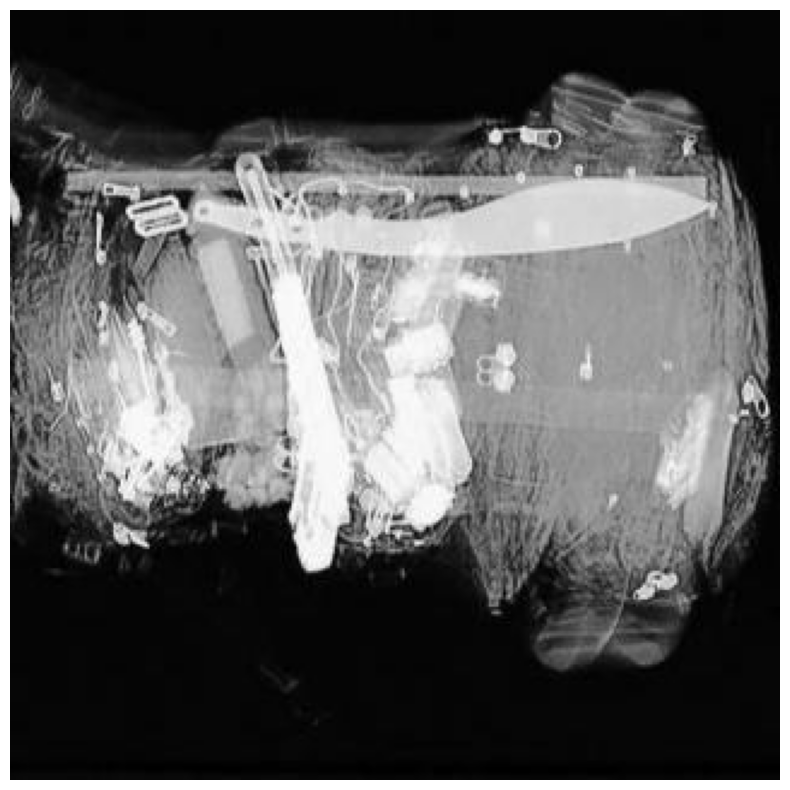

In [23]:
uploaded = files.upload()
img_infer = list(uploaded)[0]

print('Running inference on: ' + img_infer)
img_inference(img_infer)